In [1]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tweets = pd.read_csv('setDeDatos/nlp-getting-started/train.csv')
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 356.9+ KB


In [3]:
tweets['text_long'] = tweets['text'].apply(lambda x: len(x))

In [4]:
tweets['location'] = tweets['location'].fillna('sin ubicacion')
tweets['keyword'] = tweets['keyword'].fillna('sin keyword')

In [5]:
tweets['words_count'] = tweets['text'].apply(lambda x: len(x.split(' ')))

In [24]:
##Me quedo con las 10 ubicaciones con la mayor cantidad de tweets
location = tweets['location'].value_counts().head(10).reset_index()
tweets_filter = tweets[tweets['location'].isin(location['index'])]
tweets_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2937 entries, 0 to 7612
Data columns (total 7 columns):
id             2937 non-null int64
keyword        2937 non-null object
location       2937 non-null object
text           2937 non-null object
target         2937 non-null int64
text_long      2937 non-null int64
words_count    2937 non-null int64
dtypes: int64(4), object(3)
memory usage: 183.6+ KB


In [7]:
##Me quedo con las 10 keywords con mayor cantidad de tweets
keyword = tweets['keyword'].value_counts().head(10).reset_index()
tweets_filter = tweets_filter[tweets_filter['keyword'].isin(keyword['index'])]
tweets_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 7612
Data columns (total 7 columns):
id             195 non-null int64
keyword        195 non-null object
location       195 non-null object
text           195 non-null object
target         195 non-null int64
text_long      195 non-null int64
words_count    195 non-null int64
dtypes: int64(4), object(3)
memory usage: 12.2+ KB


In [8]:
heat_map = tweets_filter.groupby(['keyword','location']).agg({'text_long':'count'}).reset_index()

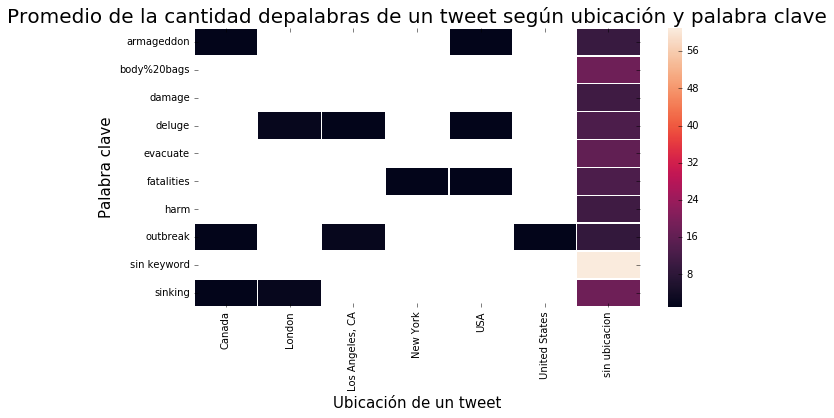

In [9]:
fig, ax = plt.subplots(figsize=(10,5))  
heat_map = heat_map.pivot("keyword", "location", "text_long")
ax = sns.heatmap(heat_map,linewidths=.5,ax=ax)
ax.set_title("Promedio de la cantidad depalabras de un tweet según ubicación y palabra clave",fontsize=20)
ax.set_xlabel("Ubicación de un tweet",fontsize=15)
ax.set_ylabel("Palabra clave",fontsize=15)

In [15]:
heat_map2 = tweets_filter.groupby(['keyword','location']).agg({'text_long':'mean'}).reset_index()

In [14]:
tweets_filter

,id,keyword,location,text,target,text_long,words_count
0,1,sin keyword,sin ubicacion,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,4,sin keyword,sin ubicacion,Forest fire near La Ronge Sask. Canada,1,38,7
2,5,sin keyword,sin ubicacion,All residents asked to 'shelter in place' are ...,1,133,22
3,6,sin keyword,sin ubicacion,"13,000 people receive #wildfires evacuation or...",1,65,9
4,7,sin keyword,sin ubicacion,Just got sent this photo from Ruby #Alaska as ...,1,88,17
5,8,sin keyword,sin ubicacion,#RockyFire Update => California Hwy. 20 closed...,1,110,18
6,10,sin keyword,sin ubicacion,#flood #disaster Heavy rain causes flash flood...,1,95,14
7,13,sin keyword,sin ubicacion,I'm on top of the hill and I can see a fire in...,1,59,15
8,14,sin keyword,sin ubicacion,There's an emergency evacuation happening now ...,1,79,12
9,15,sin keyword,sin ubicacion,I'm afraid that the tornado is coming to our a...,1,52,10


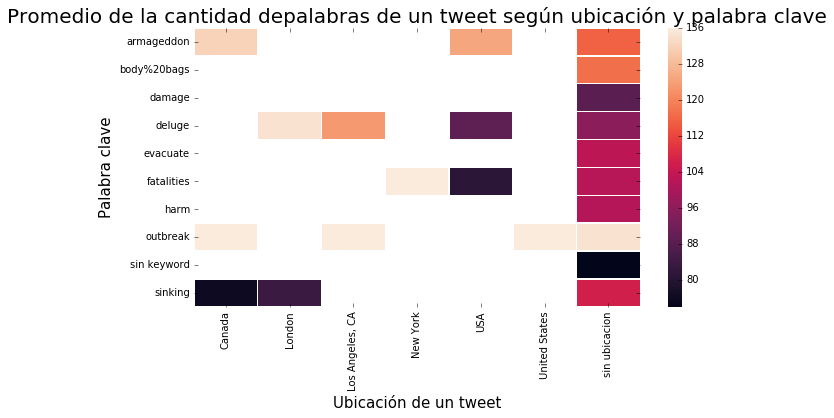

In [16]:
fig, ax = plt.subplots(figsize=(10,5))  
heat_map2 = heat_map2.pivot("keyword", "location", "text_long")
ax2 = sns.heatmap(heat_map2,linewidths=.5,ax=ax)
ax2.set_title("Promedio de la cantidad depalabras de un tweet según ubicación y palabra clave",fontsize=20)
ax2.set_xlabel("Ubicación de un tweet",fontsize=15)
ax2.set_ylabel("Palabra clave",fontsize=15)

In [17]:
heat_map3 = tweets_filter.groupby(['keyword','location']).agg({'words_count':'mean'}).reset_index()

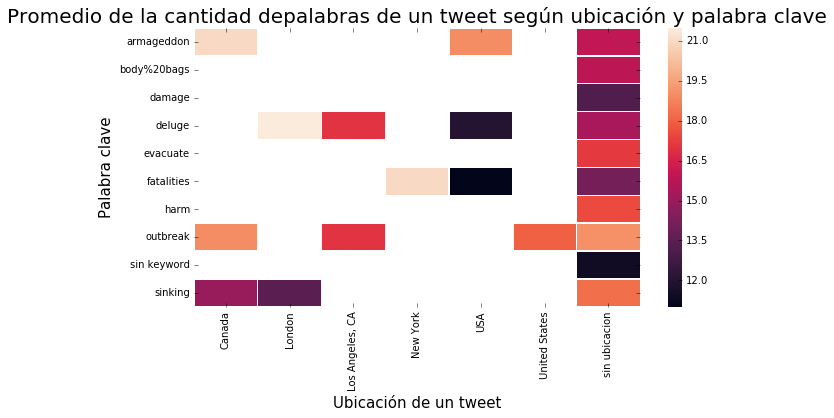

In [18]:
fig, ax = plt.subplots(figsize=(10,5))  
heat_map3 = heat_map3.pivot("keyword", "location", "words_count")
ax = sns.heatmap(heat_map3,linewidths=.5,ax=ax)

ax.set_title("Promedio de la cantidad depalabras de un tweet según ubicación y palabra clave",fontsize=20)
ax.set_xlabel("Ubicación de un tweet",fontsize=15)
ax.set_ylabel("Palabra clave",fontsize=15)

In [19]:
heat_map.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, armageddon to sinking
Data columns (total 7 columns):
Canada             3 non-null float64
London             2 non-null float64
Los Angeles, CA    2 non-null float64
New York           1 non-null float64
USA                3 non-null float64
United States      1 non-null float64
sin ubicacion      10 non-null float64
dtypes: float64(7)
memory usage: 640.0+ bytes


In [25]:
##Saco el filtro por keyword utilizo, el filtro por localidad
heat_map4 = tweets_filter.groupby(['location','words_count']).agg({'text_long':'mean'}).reset_index()

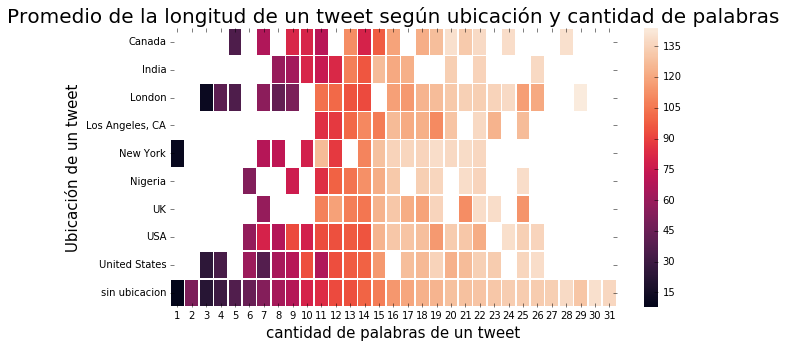

In [26]:
fig, ax = plt.subplots(figsize=(10,5))  
heat_map4 = heat_map4.pivot("location", "words_count", "text_long")
ax1 = sns.heatmap(heat_map4,  linewidths=.5,ax=ax)
ax1.set_title("Promedio de la longitud de un tweet según ubicación y cantidad de palabras",fontsize=20)
ax1.set_xlabel("cantidad de palabras de un tweet",fontsize=15)
ax1.set_ylabel("Ubicación de un tweet",fontsize=15)